# Simulated Annealing

## 1D Non-Convex Function

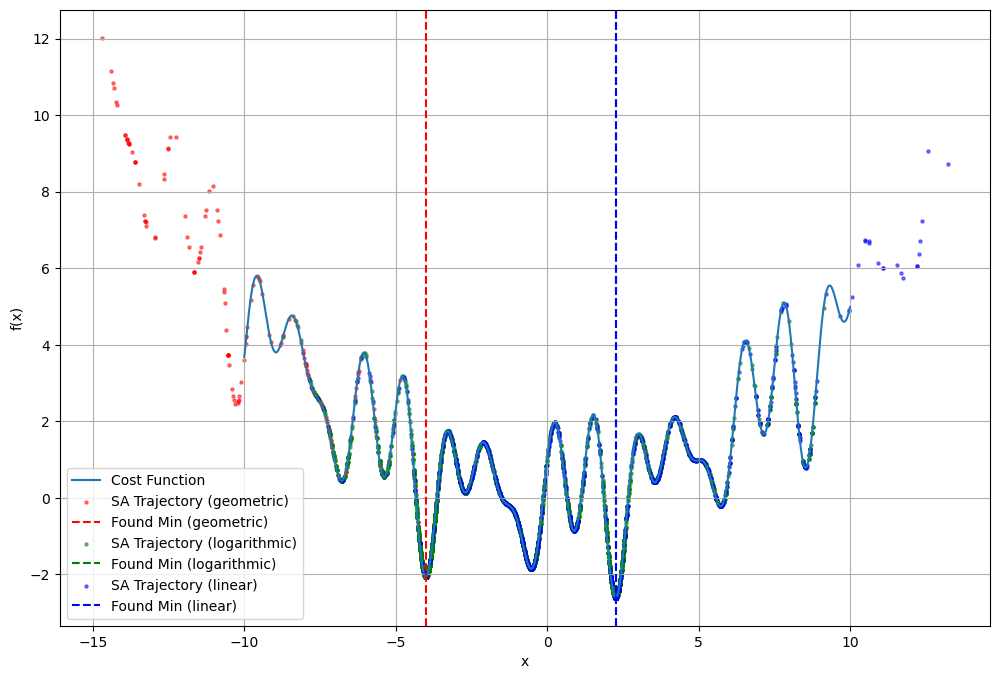

Schedule: geometric, Found minimum at x=-4.0044526716774556, f(x)=-2.060424883536527
Schedule: logarithmic, Found minimum at x=2.262718473191227, f(x)=-2.607346036265259
Schedule: linear, Found minimum at x=2.263806621811196, f(x)=-2.6073676158378714


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def cooling_schedule(T_init, iteration, schedule_type, alpha=0.99, c=0.001):
    
    if schedule_type == "geometric":
        return T_init * (alpha ** iteration)
    elif schedule_type == "logarithmic":
        return T_init / np.log(iteration + 2)
    elif schedule_type == "linear":
        T = T_init - c * iteration
        return T if T > 0 else 1e-6

def cost_function(x):
    return (x**2 / 20.0) + np.sin(5*x) + np.sin(2*x) + np.cos(4*x)

def simulated_annealing_1D(func, x_init, T_init=10.0, max_iter=5000, schedule_type="geometric", alpha=0.99, c=0.001):
    x = x_init
    f_current = func(x)
    x_best = x
    f_best = f_current
    x_history = [x]
    f_history = [f_current]

    for i in range(max_iter):
        T = cooling_schedule(T_init, i, schedule_type, alpha=alpha, c=c)
        
        # A new solution
        x_new = x + np.random.uniform(-1,1)
        f_new = func(x_new)
        delta = f_new - f_current
        
        if delta < 0 or np.exp(-delta/T) > np.random.rand():
            x = x_new
            f_current = f_new
            if f_current < f_best:
                f_best = f_current
                x_best = x
        
        x_history.append(x)
        f_history.append(f_current)
    
    return x_best, f_best, x_history, f_history

schedules = ["geometric", "logarithmic", "linear"]
results_1D = {}

for sch in schedules:
    x_initial = np.random.uniform(-10,10)
    x_opt, f_opt, x_hist, f_hist = simulated_annealing_1D(cost_function, x_initial, schedule_type=sch, max_iter=5000, T_init=10.0, alpha=0.99, c=0.01)
    results_1D[sch] = (x_opt, f_opt, x_hist, f_hist)

x_grid = np.linspace(-10,10,1000)
y_grid = cost_function(x_grid)

plt.figure(figsize=(12,8))
plt.plot(x_grid, y_grid, label='Cost Function')
colors = {'geometric':'r', 'logarithmic':'g', 'linear':'b'}

for sch in schedules:
    x_hist = results_1D[sch][2]
    plt.scatter(x_hist, cost_function(np.array(x_hist)), c=colors[sch], s=5, alpha=0.5, label=f'SA Trajectory ({sch})')
    plt.axvline(x=results_1D[sch][0], color=colors[sch], linestyle='--', label=f'Found Min ({sch})')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

for sch in schedules:
    print(f"Schedule: {sch}, Found minimum at x={results_1D[sch][0]}, f(x)={results_1D[sch][1]}")


## Traveling Salesman Problem

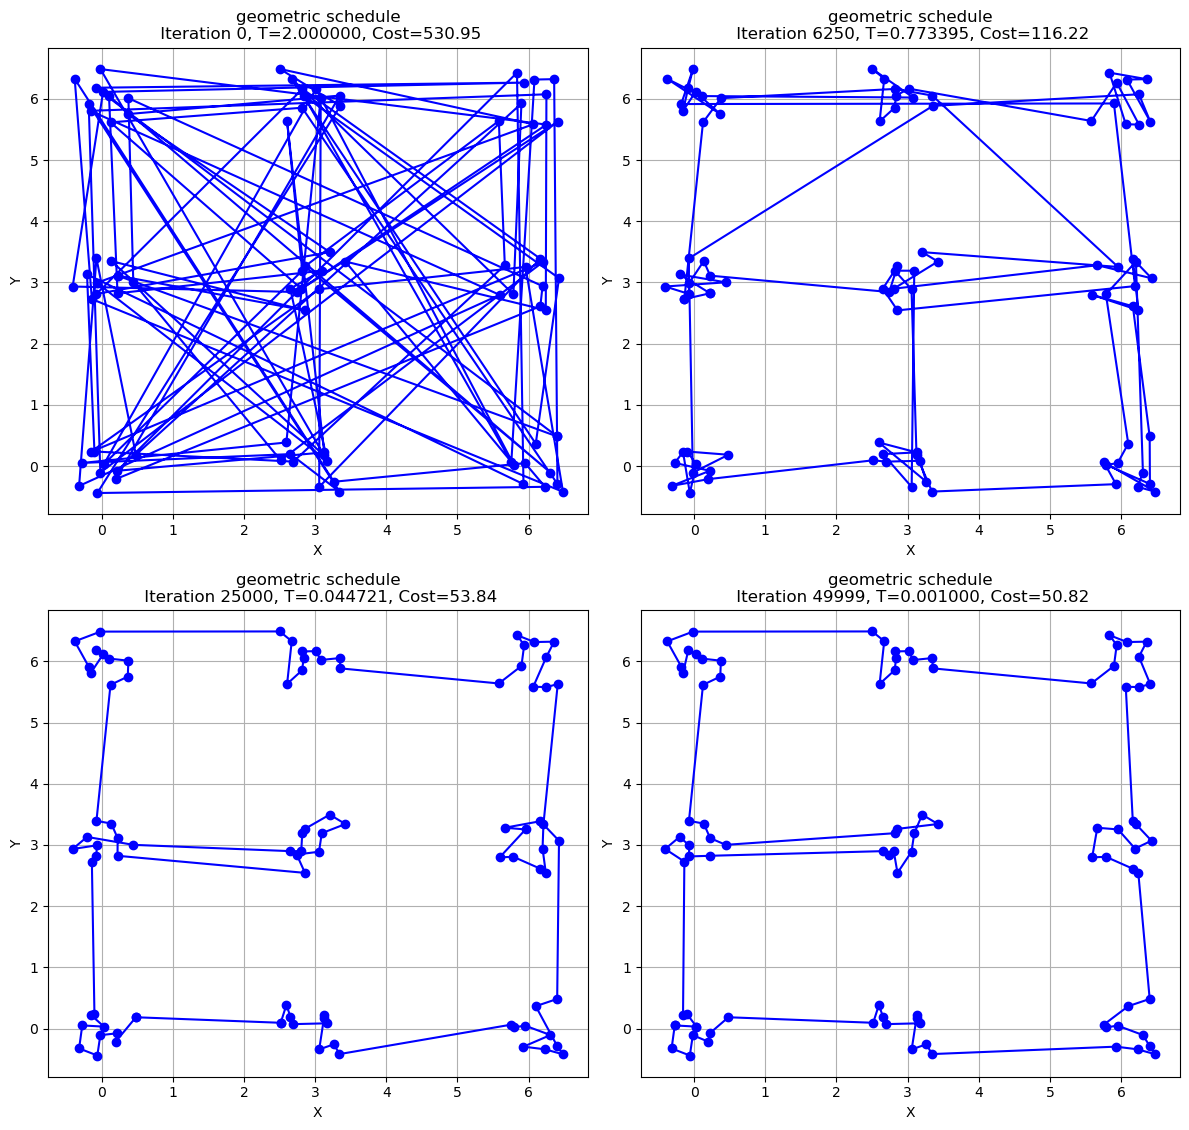

geometric schedule, Best cost=50.82, Final T=0.001000


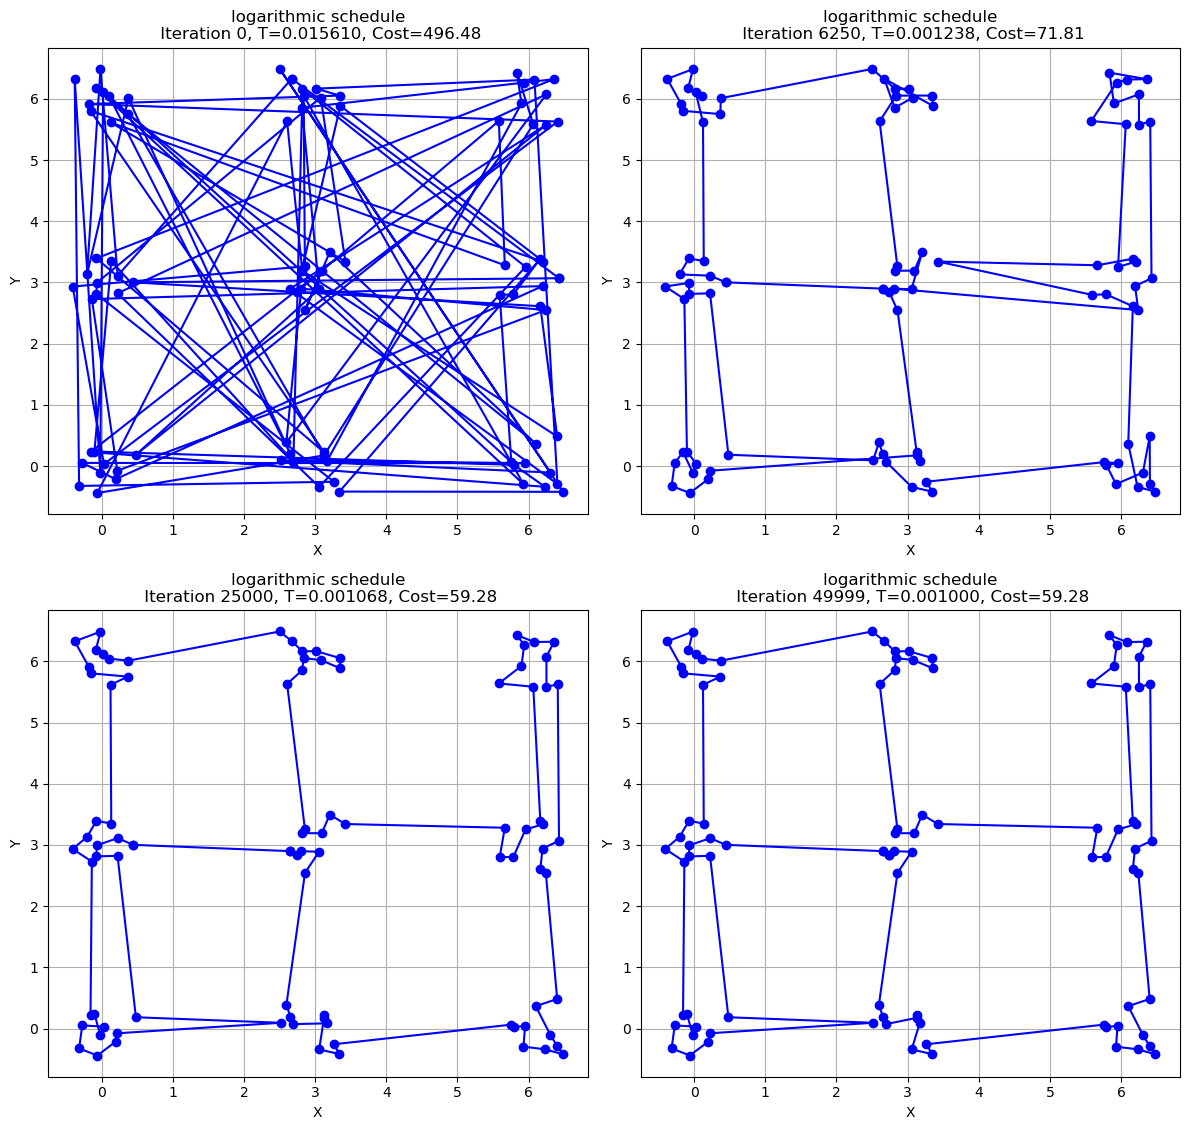

logarithmic schedule, Best cost=59.28, Final T=0.001000


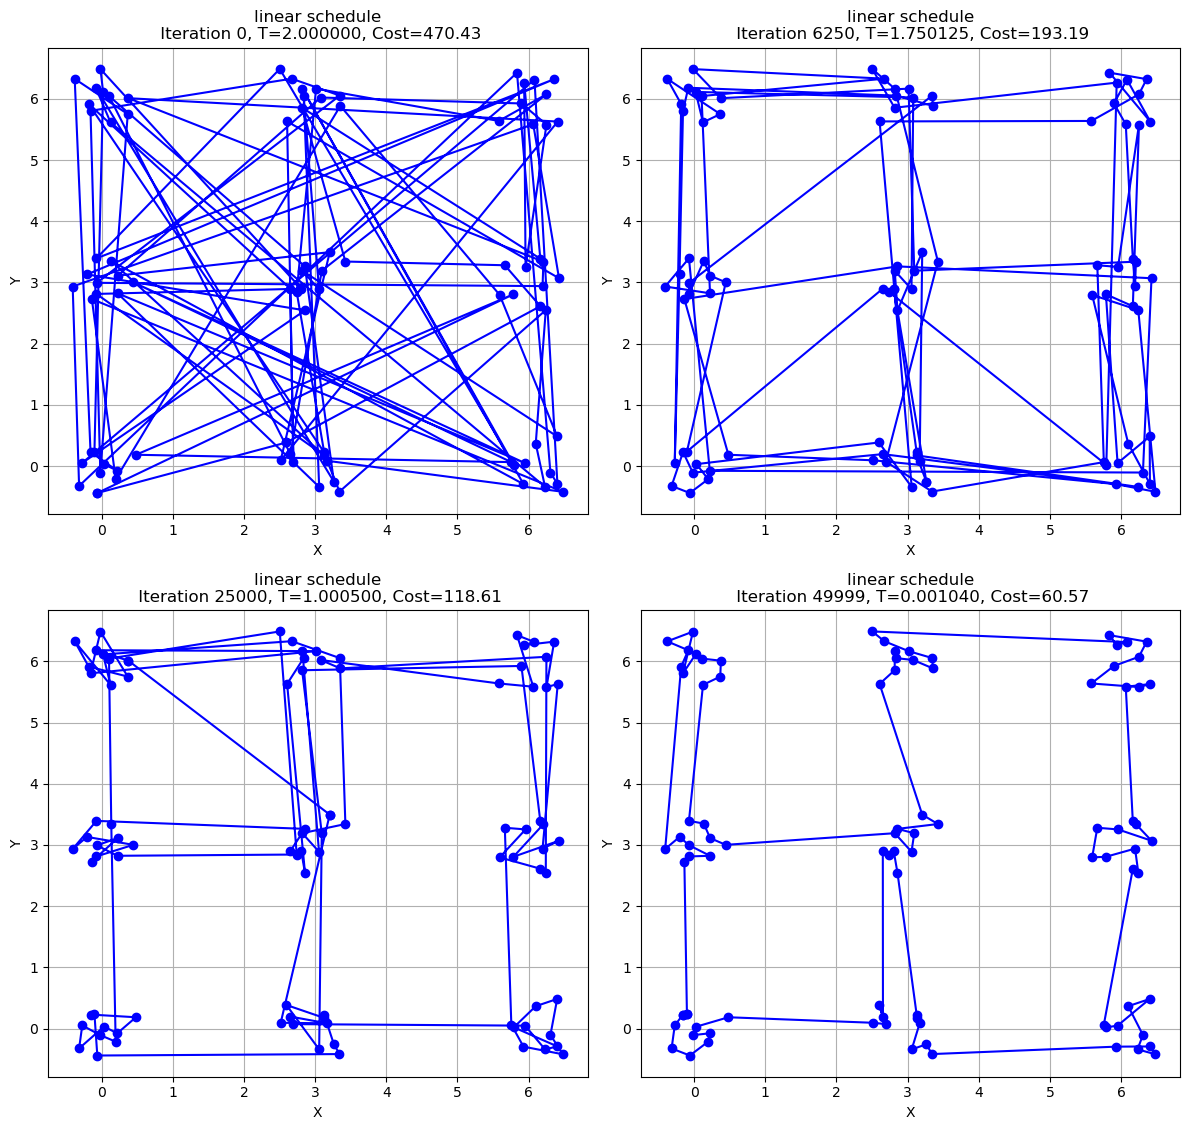

linear schedule, Best cost=60.57, Final T=0.001040


In [15]:
np.random.seed(123)
max_iter = 50000
T_final = 0.001

# For geometric:
T_init_geo = 2.0
alpha_geo = (T_final/T_init_geo)**(1/max_iter)

# For linear:
T_init_lin = 2.0
c_lin = (T_init_lin - T_final)/max_iter

# For logarithmic:
ln_val = np.log(max_iter+2)
T_init_log = T_final * ln_val

#this is hard-coded, don't change
num_clusters = 9
cluster_centers = [(i*3.0, j*3.0) for i in range(3) for j in range(3)]

cities_per_cluster = 10
cluster_spread = 0.5

all_cities = []
for cx, cy in cluster_centers:
    for _ in range(cities_per_cluster):
        x = cx + np.random.uniform(-cluster_spread, cluster_spread)
        y = cy + np.random.uniform(-cluster_spread, cluster_spread)
        all_cities.append((x,y))
        
all_cities = np.array(all_cities)

def manhattan_distance(p1, p2):
    return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])

def tsp_cost(route, cities):
    dist = 0.0
    for i in range(len(route)):
        city1 = cities[route[i]]
        #take into account the last step
        city2 = cities[route[(i+1)%len(route)]]
        dist += manhattan_distance(city1, city2)
    return dist

def random_subsequence_reversal(route):
    new_route = route.copy()
    i, j = np.sort(np.random.choice(len(route), 2, replace=False))
    new_route[i:j+1] = new_route[i:j+1][::-1]
    return new_route

def simulated_annealing_tsp(cities, T_init, max_iter, schedule_type, alpha, c):
    route = list(np.random.permutation(len(cities)))
    cost_current = tsp_cost(route, cities)
    best_route = route.copy()
    best_cost = cost_current
    
    route_history = []
    cost_history = []
    temp_history = []

    for i in range(max_iter):
        T = cooling_schedule(T_init, i, schedule_type, alpha=alpha, c=c)
        
        new_route = random_subsequence_reversal(route)
        cost_new = tsp_cost(new_route, cities)
        delta = cost_new - cost_current

        if delta < 0 or np.exp(-delta/T) > np.random.rand():
            route = new_route
            cost_current = cost_new
            if cost_current < best_cost:
                best_cost = cost_current
                best_route = route.copy()
        
        route_history.append(route.copy())
        cost_history.append(cost_current)
        temp_history.append(T)
    
    return best_route, best_cost, route_history, cost_history, temp_history

schedules = ["geometric", "logarithmic", "linear"]

results = {}

for sch in schedules:
    if sch == "geometric":
        best_route, best_cost, route_history, cost_history, temp_history = simulated_annealing_tsp(
            all_cities, T_init_geo, max_iter, sch, alpha_geo, 0.001
        )
    elif sch == "linear":
        best_route, best_cost, route_history, cost_history, temp_history = simulated_annealing_tsp(
            all_cities, T_init_lin, max_iter, sch, 0.99, c_lin
        )
    elif sch == "logarithmic":
        best_route, best_cost, route_history, cost_history, temp_history = simulated_annealing_tsp(
            all_cities, T_init_log, max_iter, sch, 0.99, 0.001
        )
    
    results[sch] = (best_route, best_cost, route_history, cost_history, temp_history)

    # Pick 4 snapshots at different iteration indexes:
    n = len(results[sch][2])
    idxs = [0, n//8, (2*n)//4, n-1]
    fig, axs = plt.subplots(2, 2, figsize=(12,12))
    axs = axs.flatten()
    
    for ax, idx in zip(axs, idxs):
        r = results[sch][2][idx]
        T_val = results[sch][4][idx]
        C_val = results[sch][3][idx]
        route_cities = all_cities[r]
        
        ax.plot(route_cities[:,0], route_cities[:,1], 'o-', color='blue')
        # Close loop
        ax.plot([route_cities[-1,0], route_cities[0,0]], [route_cities[-1,1], route_cities[0,1]], 'o-', color='blue')
        
        ax.set_title(f"{sch} schedule\n Iteration {idx}, T={T_val:.6f}, Cost={C_val:.2f}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid(True)
       

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    print(f"{sch} schedule, Best cost={best_cost:.2f}, Final T={temp_history[-1]:.6f}")

In [17]:
num_runs = 50
avg_results = {sch: [] for sch in schedules}

for sch in schedules:
    for _ in range(num_runs):
        if sch == "geometric":
            _, bc, _, _, _ = simulated_annealing_tsp(
                all_cities, T_init_geo, max_iter, sch, alpha_geo, 0.001
            )
        elif sch == "linear":
            _, bc, _, _, _ = simulated_annealing_tsp(
                all_cities, T_init_lin, max_iter, sch, 0.99, c_lin
            )
        elif sch == "logarithmic":
            _, bc, _, _, _ = simulated_annealing_tsp(
                all_cities, T_init_log, max_iter, sch, 0.99, 0.001
            )
        avg_results[sch].append(bc)

print("Average Performance:")
for sch in schedules:
    avg_cost = np.mean(avg_results[sch])
    std_cost = np.std(avg_results[sch])
    print(f"{sch} schedule, average best cost: {avg_cost:.2f} ± {std_cost:.2f}")

Average Performance:
geometric schedule, average best cost: 52.52 ± 2.26
logarithmic schedule, average best cost: 59.04 ± 4.38
linear schedule, average best cost: 56.53 ± 2.34
